In [7]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [8]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'C:\Users\madhu\Desktop\potato-disease-classification-main-main\train_test_val\train'
valid_path = r'C:\Users\madhu\Desktop\potato-disease-classification-main-main\train_test_val\test'

In [9]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
xception= Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

83683744/83683744 [==============================] - 8s 0us/step


In [10]:
# don't train existing weights
for layer in xception.layers:
    layer.trainable = False

In [11]:
  # useful for getting number of output classes
folders = glob(r'C:\Users\madhu\Desktop\potato-disease-classification-main-main\train_test_val\train\*')

In [12]:
# our layers - you can add more if you want
x = Flatten()(xception.output)

In [13]:
prediction = Dense(3, activation='softmax')(x)

# create a model object
model = Model(inputs=xception.input, outputs=prediction)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

 block4_sepconv1_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 28, 28, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 28, 28, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 14, 14, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 14, 14, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 14, 14, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 14, 14, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 14, 14, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 14, 14, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 14, 14, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 14, 14, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r"C:\Users\madhu\Desktop\potato-disease-classification-main-main\train_test_val\train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1721 images belonging to 3 classes.


In [18]:
test_set = test_datagen.flow_from_directory(r"C:\Users\madhu\Desktop\potato-disease-classification-main-main\train_test_val\test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 216 images belonging to 3 classes.


In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
54/54 [==============================] - 256s 5s/step - loss: 1.1389 - accuracy: 0.8356 - val_loss: 0.4568 - val_accuracy: 0.9167
Epoch 2/10
54/54 [==============================] - 231s 4s/step - loss: 0.3162 - accuracy: 0.9303 - val_loss: 0.2038 - val_accuracy: 0.9444
Epoch 3/10
54/54 [==============================] - 225s 4s/step - loss: 0.1782 - accuracy: 0.9570 - val_loss: 0.2343 - val_accuracy: 0.9537
Epoch 4/10
54/54 [==============================] - 206s 4s/step - loss: 0.3441 - accuracy: 0.9343 - val_loss: 0.2742 - val_accuracy: 0.9306
Epoch 5/10
54/54 [==============================] - 203s 4s/step - loss: 0.4257 - accuracy: 0.9256 - val_loss: 0.4393 - val_accuracy: 0.9491
Epoch 6/10
54/54 [==============================] - 206s 4s/step - loss: 0.2690 - accuracy: 0.9494 - val_loss: 0.3844 - val_accuracy: 0.9398
Epoch 7/10
54/54 [==============================] - 206s 4s/step - loss: 0.0942 - accuracy: 0.9773 - val_loss: 0.4105 - val_accuracy: 0.9352
Epoch 8/10
54

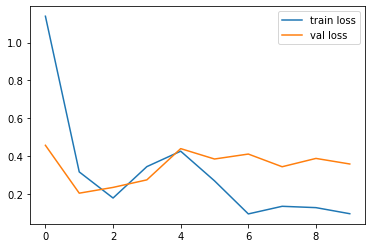

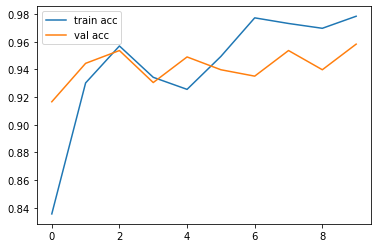

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')